In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("/content/Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.shape

(10000, 14)

In [7]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

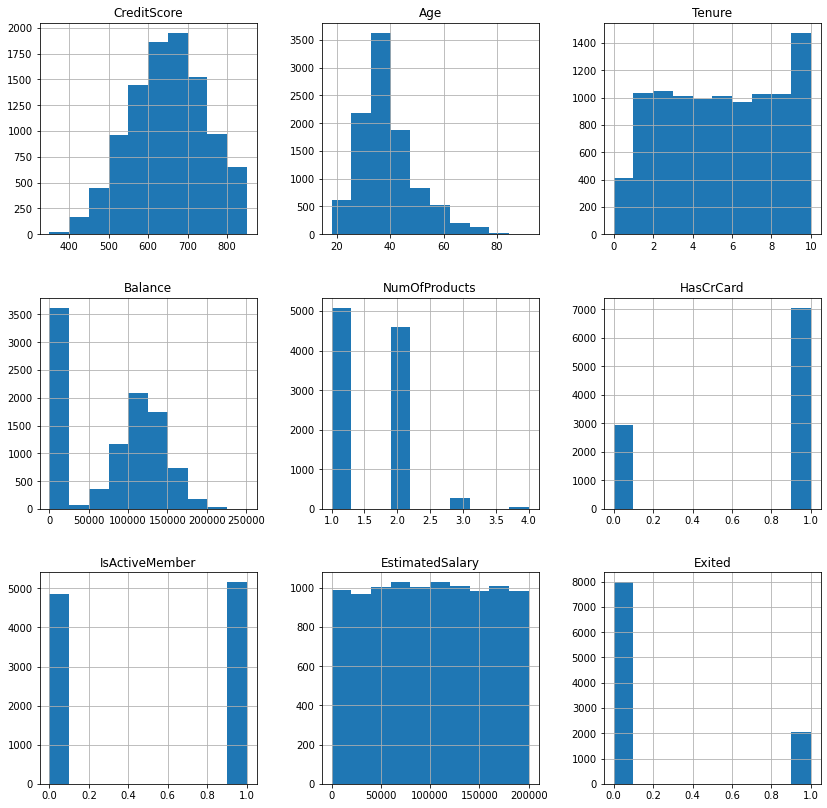

In [11]:
data.hist(figsize=(14,14))
plt.show()

In [12]:
# Check if data has any null values
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [14]:
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [15]:
# Label encode Object Datatypes

data_types_dict = dict(data.dtypes)
# Keep track mappings column name to LabelEncoders
Label_encoder_collection = {}
for col_name, data_type in data_types_dict.items():
  if data_type == "object":
    Le = LabelEncoder()
    data[col_name] = Le.fit_transform(data[col_name])
    Label_encoder_collection[col_name] = Le

In [16]:
Label_encoder_collection

{'Gender': LabelEncoder(), 'Geography': LabelEncoder()}

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [18]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [21]:
data.iloc[:, :-1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [22]:
data.iloc[:, :-1].values

array([[6.1900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 2.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [7.0900000e+02, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [7.7200000e+02, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [7.9200000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [46]:
data["Exited"]

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

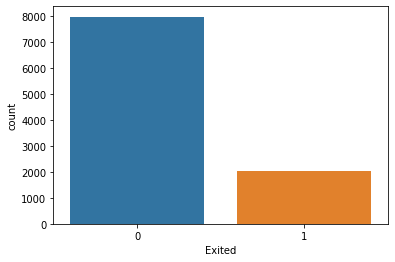

In [47]:
sns.countplot(x="Exited", data=data)

In [23]:
X = data.iloc[:, :-1].values.astype(np.float32)
Y = data.iloc[:, -1].values.astype(int)

In [24]:
Y

array([1, 0, 1, ..., 1, 1, 0])

In [27]:
X.shape

(10000, 10)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 4)

**Building the Neural Network**

In [28]:
# Start the model with Sequential object
model = tf.keras.models.Sequential()

# Next add in the input object and specify the dimension to pass in
model.add(tf.keras.Input(shape=(10,))) # 10 here represents the number of columns in the data set

# Add in the neurons the first layer
model.add(tf.keras.layers.Dense(32))

# Add 2nd layer
model.add(tf.keras.layers.Dense(32))

# Final Sigmoid layer to predict (0/1)
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Print summary to understand the neural network flow
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [29]:
# create the optimizer and compile the model
Optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(Optimizer, loss="binary_crossentropy", metrics=["accuracy"])

In [31]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
250/250 [==============================] - 1s 2ms/step - loss: 2609.0608 - accuracy: 0.6173 - val_loss: 395.9226 - val_accuracy: 0.7815
Epoch 2/20
250/250 [==============================] - 0s 2ms/step - loss: 304.8539 - accuracy: 0.6420 - val_loss: 274.4103 - val_accuracy: 0.4340
Epoch 3/20
250/250 [==============================] - 0s 2ms/step - loss: 298.3953 - accuracy: 0.6631 - val_loss: 674.5622 - val_accuracy: 0.2240
Epoch 4/20
250/250 [==============================] - 0s 2ms/step - loss: 292.9858 - accuracy: 0.6718 - val_loss: 121.8342 - val_accuracy: 0.8010
Epoch 5/20
250/250 [==============================] - 0s 2ms/step - loss: 296.1495 - accuracy: 0.6704 - val_loss: 147.1156 - val_accuracy: 0.7980
Epoch 6/20
250/250 [==============================] - 0s 2ms/step - loss: 309.7836 - accuracy: 0.6774 - val_loss: 211.7882 - val_accuracy: 0.8020
Epoch 7/20
250/250 [==============================] - 0s 2ms/step - loss: 260.2733 - accuracy: 0.6691 - val_loss: 340.3751 

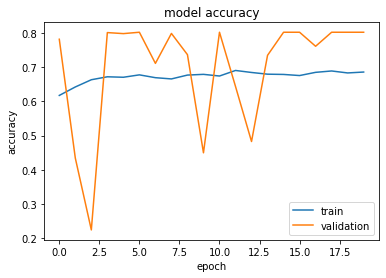

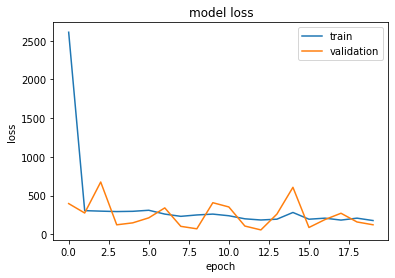

In [35]:
# Accuracy plot 
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['train', "validation"], loc='lower right')
plt.show()


# Loss plot
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train', "validation"], loc='upper right')
plt.show()

In [36]:
# Generating prediction on testing set
y_pred = np.round(model.predict(X_test))

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
accuracy_score(y_test, y_pred)

0.802

In [39]:
## Accuracy seems good

In [40]:
import seaborn as sns

In [41]:
cm = confusion_matrix(y_test, y_pred)
cm 

array([[1604,    0],
       [ 396,    0]])

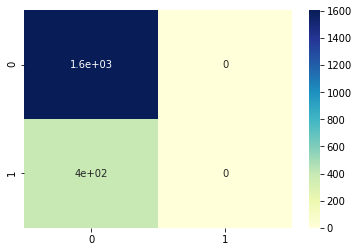

In [43]:
sns.heatmap(cm, annot=True, cmap="YlGnBu")

Let's improve the model:
1. Add in Class weights to handle imbalance
2. Increase Units in Dense layers and also increase Number of layers
3. Add Batch Normalisation to layers
4. add dropout after layers

In [48]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight="balanced", classes = np.unique(y_train), y=y_train)

model_class_weights = {}
for e, weight in enumerate(class_weights):
  model_class_weights[e] = weight 

In [49]:
model_class_weights

{0: 0.6290297216543481, 1: 2.437538086532602}

In [50]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(10,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Print summary to understand the neural network flow
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1408      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)               

In [51]:
# create the optimizer and compile the model
Optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(Optimizer, loss="binary_crossentropy", metrics=["accuracy"])

In [52]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, class_weight=model_class_weights)

Epoch 1/20
250/250 [==============================] - 2s 4ms/step - loss: 0.6074 - accuracy: 0.6705 - val_loss: 0.5526 - val_accuracy: 0.7140
Epoch 2/20
250/250 [==============================] - 1s 3ms/step - loss: 0.5434 - accuracy: 0.7125 - val_loss: 0.4660 - val_accuracy: 0.7675
Epoch 3/20
250/250 [==============================] - 1s 3ms/step - loss: 0.5278 - accuracy: 0.7383 - val_loss: 0.4852 - val_accuracy: 0.7510
Epoch 4/20
250/250 [==============================] - 1s 3ms/step - loss: 0.5175 - accuracy: 0.7365 - val_loss: 0.4617 - val_accuracy: 0.7845
Epoch 5/20
250/250 [==============================] - 1s 3ms/step - loss: 0.5019 - accuracy: 0.7492 - val_loss: 0.4655 - val_accuracy: 0.7675
Epoch 6/20
250/250 [==============================] - 1s 3ms/step - loss: 0.5011 - accuracy: 0.7492 - val_loss: 0.4345 - val_accuracy: 0.8105
Epoch 7/20
250/250 [==============================] - 1s 3ms/step - loss: 0.5013 - accuracy: 0.7610 - val_loss: 0.4421 - val_accuracy: 0.8045
Epoch 

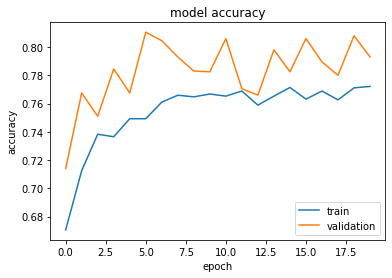

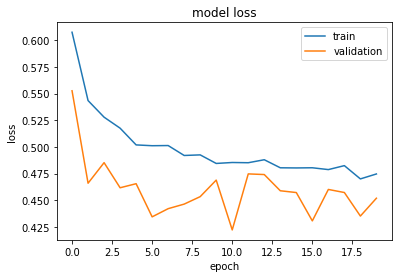

In [53]:
# Accuracy plot 
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['train', "validation"], loc='lower right')
plt.show()


# Loss plot
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train', "validation"], loc='upper right')
plt.show()

In [54]:
# Generating prediction on testing set
y_pred = np.round(model.predict(X_test))

In [55]:
accuracy_score(y_test, y_pred)

0.793

In [56]:
cm_2 = confusion_matrix(y_test, y_pred)
cm_2

array([[1270,  334],
       [  80,  316]])

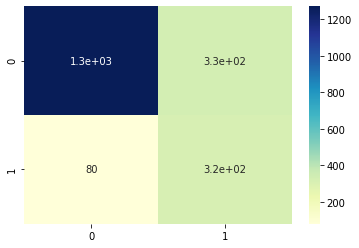

In [57]:
sns.heatmap(cm_2, annot=True, cmap="YlGnBu")

In [58]:
from sklearn.metrics import classification_report

In [60]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      1604
           1       0.49      0.80      0.60       396

    accuracy                           0.79      2000
   macro avg       0.71      0.79      0.73      2000
weighted avg       0.85      0.79      0.81      2000

